## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

#`Imports`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [2]:
url = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Pandas/refs/heads/data-tests/alunos.csv'

In [3]:
pd.read_csv(url)
dados_alunos = pd.read_csv(url)

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [4]:
dados_alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [5]:
dados_alunos.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [6]:
dados_alunos.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [7]:
dados_alunos.info

<bound method DataFrame.info of          Nome  Idade  Notas  Aprovado
0         Ary     20    7.5      True
1         Ana     18    NaN     False
2       Cátia     27    2.5     False
3       Denis     18    5.0     False
4        Beto     21   10.0      True
5       Bruna     23    NaN     False
6        Dara     21    7.0      True
7      Carlos     19    6.0      True
8       Alice     35    5.6     False
9       Vitor     28    NaN     False
10     Daniel     21    NaN     False
11       Igor     24    4.5     False
12  Sthefanie     26    9.5      True
13      Mirla     25    9.0      True
14      Paulo     37    NaN     False
15     Mylena     29    7.0      True
16      Lucas     33    NaN     False
17      Nadia     34    8.0      True>

In [8]:
dados_alunos.dtypes

,0
Nome,object
Idade,int64
Notas,float64
Aprovado,bool


In [9]:
dados_alunos.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [10]:
dados_alunos['Nome']

,Nome
0,Ary
1,Ana
2,Cátia
3,Denis
4,Beto
5,Bruna
6,Dara
7,Carlos
8,Alice
9,Vitor


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [11]:
dados_alunos.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [12]:
# importando a base de dados
url_2 = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Pandas/refs/heads/data-tests/aluguel.csv'
dados_imoveis = pd.read_csv(url_2, sep=';')

In [13]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df_imoveis = dados_imoveis.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df_imoveis = df_imoveis.query('Tipo == "Apartamento"')

# visualizando a base de dados
df_imoveis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [14]:
df_imoveis['Quartos'].mean()

np.float64(2.481568707761622)

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [15]:
df_imoveis['Bairro'].nunique()

149

`Alternativa do instrutor: `

In [16]:

len(df_imoveis['Bairro'].unique())

149

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [17]:
df_imoveis.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

In [18]:
alto_padrao = df_imoveis.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(5)
alto_padrao

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116


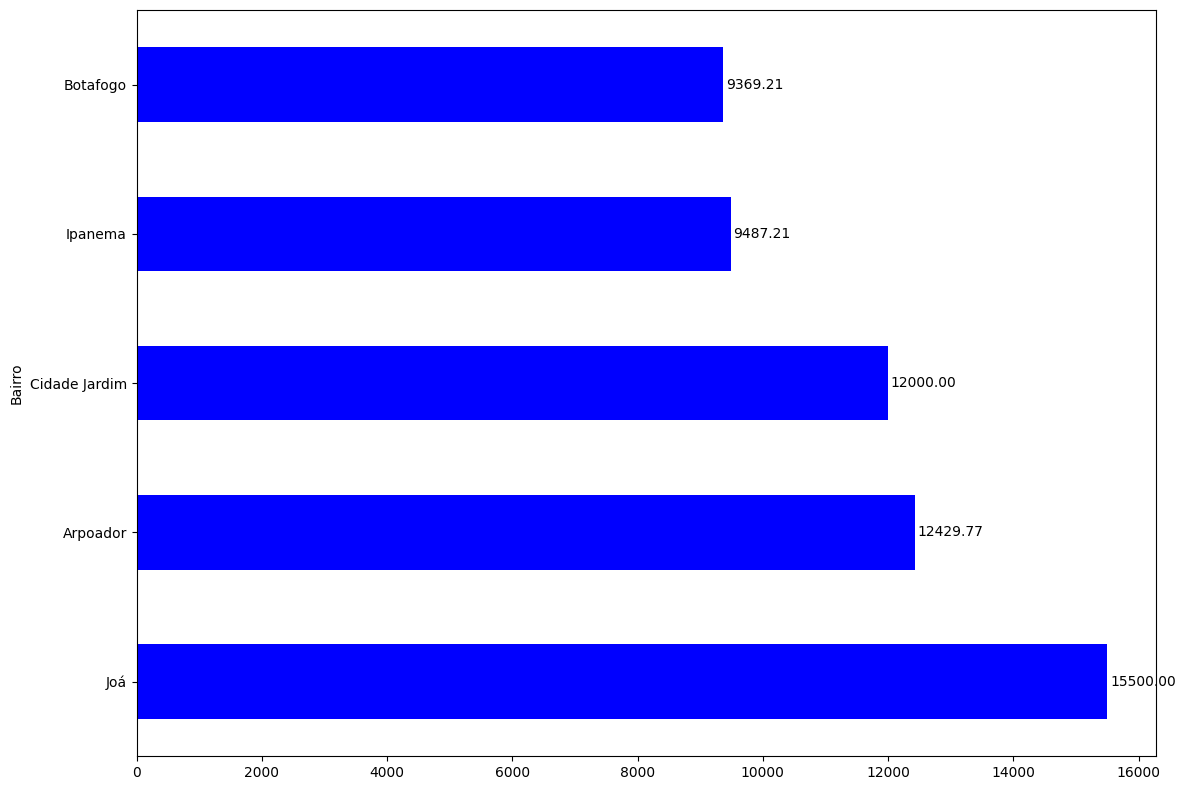

In [19]:
ax = alto_padrao.plot(kind='barh', figsize=(12, 8), color ='blue')

# Adiciona os rótulos de valor nas barras e os alinha à direita
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge',  padding=2)

# Ajusta o layout do gráfico para criar espaço para os rótulos
ax.figure.tight_layout()

## Aula 3


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [20]:
dados_alunos.isnull().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


In [21]:
dados_alunos.fillna(0, inplace=True)

In [22]:
dados_alunos.isnull().sum()


,0
Nome,0
Idade,0
Notas,0
Aprovado,0


In [23]:
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [24]:
remover_alunos = dados_alunos.query('Nome == "Alice" | Nome == "Carlos"').index

In [25]:
dados_alunos.drop(remover_alunos, axis=0, inplace=True)

In [26]:
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [27]:
dados_alunos.reset_index(drop=True) #Necessário para ajustar a contagem do index

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Vitor,28,0.0,False
8,Daniel,21,0.0,False
9,Igor,24,4.5,False


In [28]:
dados_alunos['Nome']

,Nome
0,Ary
1,Ana
2,Cátia
3,Denis
4,Beto
5,Bruna
6,Dara
9,Vitor
10,Daniel
11,Igor


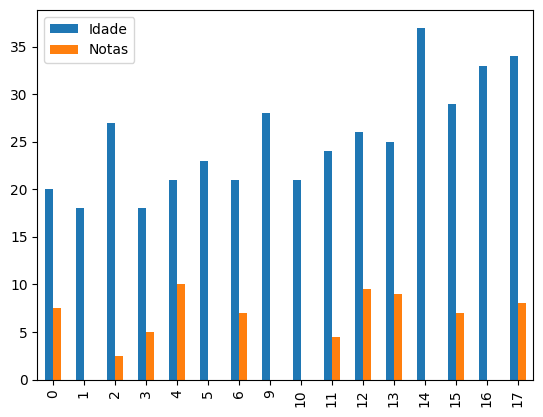

In [29]:
dados_alunos.plot(kind='bar')
plt.show()

### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [67]:
habilitados = dados_alunos['Aprovado'] == True
#indexação booleana diretamente

In [68]:
dados_alunos[habilitados]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [69]:
alunos_aprovados = dados_alunos[habilitados]

In [70]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)
pd.read_csv('alunos_aprovados.csv', sep=',')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [71]:
alunos_aprovados['Notas'] = alunos_aprovados['Notas'].replace(7.0, 8.0)
alunos_aprovados

/tmp/ipython-input-4010121643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_aprovados['Notas'] = alunos_aprovados['Notas'].replace(7.0, 8.0)


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


In [75]:
# Usando .loc para evitar SettingWithCopyWarning
alunos_aprovados.loc[alunos_aprovados['Notas'] == 7.0, 'Notas'] = 8.0
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


# 📌 Resumo: `.loc` no pandas

O `.loc` é um método do **pandas** utilizado para acessar ou modificar linhas e colunas de um DataFrame **pelo rótulo** ou **condições booleanas**.

---

## 1️⃣ Sintaxe básica

```python
df.loc[linhas, colunas]
````

* **`linhas`** → pode ser um rótulo, uma lista de rótulos ou uma condição booleana.
* **`colunas`** → pode ser um rótulo, uma lista de rótulos ou `:` para todas as colunas.

---

## 2️⃣ Exemplo prático

```python
import pandas as pd

dados = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carla'],
    'Notas': [7.0, 6.5, 7.0],
    'Aprovado': [True, False, True]
})

# Substituir notas iguais a 7 por 8
dados.loc[dados['Notas'] == 7.0, 'Notas'] = 8.0
```

✅ Resultado:

| Nome  | Notas | Aprovado |
| ----- | ----- | -------- |
| Ana   | 8.0   | True     |
| Bruno | 6.5   | False    |
| Carla | 8.0   | True     |

---

## 3️⃣ Diferença de usar ou não usar `.loc`

### Sem `.loc`:

```python
dados['Notas'][dados['Notas'] == 7.0] = 8.0
```

⚠️ Pode gerar **SettingWithCopyWarning**, pois o pandas não sabe se você está alterando o DataFrame original ou uma cópia.

### Com `.loc`:

```python
dados.loc[dados['Notas'] == 7.0, 'Notas'] = 8.0
```

✅ Método seguro, explícito e recomendado para alterar valores **condicionalmente**.

---

## 4️⃣ Quando usar `.loc`

* Quando quiser **filtrar linhas por condição** e **modificar colunas específicas**.
* Quando precisar de uma seleção **clara e sem warnings**.
* Ideal para **atualizações condicionais** e extrações de subconjuntos por rótulo.

---

## 5️⃣ Dica extra: `.iloc`

* `.iloc` funciona **por índice numérico** (posição) em vez de rótulo.
* Útil para casos em que você conhece a **posição exata** da linha e coluna, mas não o nome.

```python
dados.iloc[0, 1] = 8.0  # Linha 0, coluna 1
```

---

💡 **Resumo mental:**

* `.loc` → rótulos ou condições
* `.iloc` → posições
* Sempre prefira `.loc` para **seleções seguras e condicionalmente complexas**.

--------------------


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [59]:
# Importando novamente os dados


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras